1. Phillip's pearson r was in training set. Do the same on the predicted values of my models to compare
2. Use my result from 20231211 rerun

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
# stats.pearsonr(x, y)


In [2]:
# Looks like I did calculated training pearson r!
# Need to plot results of SNPs filtered GWAS pval=1e-05

In [3]:
path = '/belowshare/vumcshare/data100t1/home/wanying/CCHC/lipidomics'
folder = '20231211_rerun/outputs/prediction_models/elastic_net/model_performance/'
fn = 'model_performance_train_species_pval_1e-05.txt'
df = pd.read_csv(os.path.join(path, folder, fn), sep='\t')
df['pearson_r'] = np.sqrt(df['pearson_r2'])
df.head()

,Lipid,pearson_r2,pearson_pval,model_fitting_r2,pearson_r
0,DG(16:1_18:1),0.070557,2.524847e-27,-0.058901,0.265625
1,GM3(d18:1/18:0),0.069114,8.844140e-27,-0.079597,0.262895
2,HexCer(d18:2/24:0),0.064726,3.958171e-25,-0.081509,0.254413
3,PC(P-36:3),0.039365,1.038065e-15,-0.128995,0.198405
4,LPC(20:4) [sn2],0.055329,1.291001e-21,-0.046210,0.235221


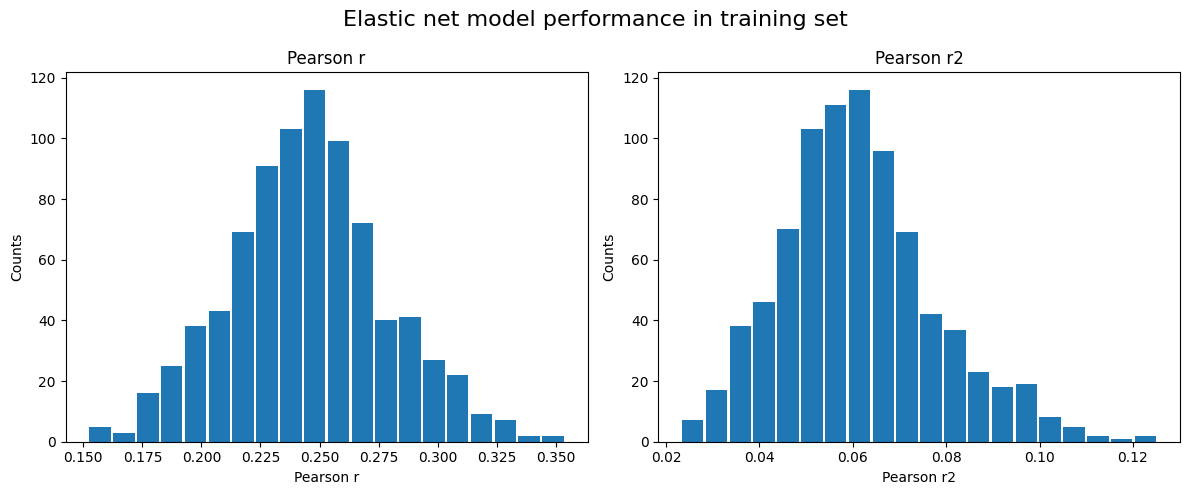

In [4]:
fig, ax = plt.subplots(ncols=2, dpi=100, figsize=(12,5))
ax[0].hist(df['pearson_r'], bins=20, rwidth=0.9)
ax[0].set_title('Pearson r')
ax[0].set_xlabel('Pearson r')
ax[0].set_ylabel('Counts')
ax[1].hist(df['pearson_r2'], bins=20,rwidth=0.9)
ax[1].set_title('Pearson r2')
ax[1].set_xlabel('Pearson r2')
ax[1].set_ylabel('Counts')

fig.suptitle('Elastic net model performance in training set', fontsize=16)
fig.tight_layout()

In [5]:
# Plot Phillip's result
df_p = '../inputs/from_phillip_Reanalyzed_Lipid_Model_Results.csv'
df_p = pd.read_csv(df_p)
df_p

,Lipid,R,R_Squared,P
0,LPC-26_0-_[sn1],0.666155,0.443762,1.110000e-187
1,PE-18_0_20_3-_-a-,0.659351,0.434743,1.370000e-182
2,FA-18_0-,0.657561,0.432386,2.830000e-181
3,PE-P-18_0-20_3-_-a-,0.650402,0.423023,4.270000e-176
4,Cer-d17_1-24_1-,0.649413,0.421738,2.160000e-175
...,...,...,...,...
825,PC-15-MHDA_22_6-,0.349996,0.122497,2.880000e-43
826,AC-24_0-,0.341123,0.116365,4.700000e-41
827,PC-P-16_0-16_1-,0.339547,0.115292,1.140000e-40
828,LPC-P-16_0-,0.316788,0.100355,2.400000e-35


# 2. Redo calculation of the pearosn r on the predicted value from my model

## 2.1 Pearson r2 on the old predicted values

In [40]:
# Load predicted values
path_pred = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/code'
fn_pred = 'test_run.20240405_01:16:06.elastic_net.pred'
df_pred = pd.read_csv(f'{path_pred}/{fn_pred}', sep='\t').T.reset_index()
df_pred.columns = df_pred.iloc[0, :]
df_pred.rename(columns={'Lipid':'genotype_ID'}, inplace=True)
df_pred.drop(index=0, inplace=True)
print(df_pred.shape)
display(df_pred.head(2))

(1607, 2)


,genotype_ID,AC(10:0)
1,HD0280_HA0023,0.212256
2,BD2180_BD6180,0.059575


In [41]:
# Load true values
# /data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/inputs/lipid_trait/lipid_species_ID_matched.no_dup.residual.train.txt
path_true = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/inputs/lipid_trait'
fn_true = 'lipid_species_ID_matched.no_dup.residual.train.txt'
df_true = pd.read_csv(f'{path_true}/{fn_true}', sep='\t')
print(df_true.shape)
display(df_true.head(2))

(1606, 833)


,RRID,genotype_ID,LABID,Sph(d18:1),Sph(d18:2),S1P(d16:1),S1P(d18:0),S1P(d18:1),S1P(d18:2),dhCer(d18:0/16:0),...,TG(O-54:4) [NL-18:2],Ubiquinone,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
0,BD0009,BD0009_BD4009,10Y0308,0.275791,0.549473,0.721941,1.557758,1.322990,0.270136,1.181562,...,-0.065122,0.033647,1.205709,0.897438,0.353739,0.117593,-0.357713,0.627687,-0.706694,-0.918218
1,BD0058,BD0058_BD4058,10Y0246,2.874146,2.689427,0.118917,1.633277,1.847306,1.474152,0.553985,...,-0.411708,0.301072,1.222128,1.754571,1.206090,1.780087,1.669920,-0.772111,1.120944,0.108486


In [42]:
# Merge to reorder sample IDs so they match in pred and true values
df_merged = df_true.merge(df_pred, on='genotype_ID', suffixes=('_true', '_pred')).dropna()
print(df_merged.shape)
display(df_merged.head(2))

(1605, 834)


,RRID,genotype_ID,LABID,Sph(d18:1),Sph(d18:2),S1P(d16:1),S1P(d18:0),S1P(d18:1),S1P(d18:2),dhCer(d18:0/16:0),...,Ubiquinone,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH],AC(10:0)_pred
0,BD0009,BD0009_BD4009,10Y0308,0.275791,0.549473,0.721941,1.557758,1.322990,0.270136,1.181562,...,0.033647,1.205709,0.897438,0.353739,0.117593,-0.357713,0.627687,-0.706694,-0.918218,0.511359
1,BD0058,BD0058_BD4058,10Y0246,2.874146,2.689427,0.118917,1.633277,1.847306,1.474152,0.553985,...,0.301072,1.222128,1.754571,1.206090,1.780087,1.669920,-0.772111,1.120944,0.108486,-0.027348


In [43]:
lipid = 'AC(10:0)'

y_pred = df_merged[f'{lipid}_pred']
y_true = df_merged[f'{lipid}_true']

pearson_r, pval = stats.pearsonr(y_true, y_pred)
print('pearson_r=%s; pval=%s' % (pearson_r, pval))

pearson_r=0.155001920874783; pval=4.3012779981327294e-10


## 2.2 Calculate pearson r using the lastest run of AC(10:0)

In [110]:
# Load predicted values
path_pred = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/code'
fn_pred = 'test_run.20240405_01:16:06.elastic_net.pred'
df_pred = pd.read_csv(f'{path_pred}/{fn_pred}', sep='\t').T.reset_index()
df_pred.columns = df_pred.iloc[0, :]
df_pred.rename(columns={'Lipid':'genotype_ID'}, inplace=True)
df_pred.drop(index=0, inplace=True)
print(df_pred.shape)
display(df_pred.head(2))

(1607, 2)


,genotype_ID,AC(10:0)
1,HD0280_HA0023,0.212256
2,BD2180_BD6180,0.059575


In [46]:
# Load true values
# /data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/inputs/lipid_trait/lipid_species_ID_matched.no_dup.residual.train.txt
path_true = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/inputs/lipid_trait'
fn_true = 'lipid_species_ID_matched.no_dup.residual.train.txt'
df_true = pd.read_csv(f'{path_true}/{fn_true}', sep='\t')
print(df_true.shape)
display(df_true.head(2))

(1606, 833)


,RRID,genotype_ID,LABID,Sph(d18:1),Sph(d18:2),S1P(d16:1),S1P(d18:0),S1P(d18:1),S1P(d18:2),dhCer(d18:0/16:0),...,TG(O-54:4) [NL-18:2],Ubiquinone,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
0,BD0009,BD0009_BD4009,10Y0308,0.275791,0.549473,0.721941,1.557758,1.322990,0.270136,1.181562,...,-0.065122,0.033647,1.205709,0.897438,0.353739,0.117593,-0.357713,0.627687,-0.706694,-0.918218
1,BD0058,BD0058_BD4058,10Y0246,2.874146,2.689427,0.118917,1.633277,1.847306,1.474152,0.553985,...,-0.411708,0.301072,1.222128,1.754571,1.206090,1.780087,1.669920,-0.772111,1.120944,0.108486


In [52]:
# Merge to reorder sample IDs so they match in pred and true values
df_merged = df_pred.merge(df_true, on='genotype_ID', suffixes=('_pred', '_true')).dropna()
print(df_merged.shape)
display(df_merged.head(2))

lipid = 'AC(10:0)'

y_pred = df_merged[f'{lipid}_pred']
y_true = df_merged[f'{lipid}_true']

pearson_r, pval = stats.pearsonr(y_true, y_pred)
print('pearson_r=%s; pval=%s' % (pearson_r, pval))

(1605, 834)


,genotype_ID,AC(10:0)_pred,RRID,LABID,Sph(d18:1),Sph(d18:2),S1P(d16:1),S1P(d18:0),S1P(d18:1),S1P(d18:2),...,TG(O-54:4) [NL-18:2],Ubiquinone,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
0,HD0280_HA0023,0.212256,HD0280,HA0023,-0.339951,-0.170701,0.814511,-0.427198,0.179437,-0.011717,...,1.872594,2.232407,0.603576,2.239502,0.415654,0.743174,0.869055,0.668410,1.456435,1.450304
1,BD2180_BD6180,0.059575,BD2180,BD6180,0.553130,0.047548,0.513360,0.055841,-0.003907,0.194015,...,0.200408,0.305447,-0.025659,0.216356,0.437537,0.798622,1.090957,-0.144494,0.435726,-0.098747


pearson_r=0.15500192087478298; pval=4.3012779981327294e-10


In [53]:
df_merged[['RRID', 'genotype_ID', 'LABID', 'AC(10:0)_true', 'AC(10:0)_pred']]

,RRID,genotype_ID,LABID,AC(10:0)_true,AC(10:0)_pred
0,HD0280,HD0280_HA0023,HA0023,-0.405527,0.212256
1,BD2180,BD2180_BD6180,BD6180,-0.544718,0.059575
2,BD2179,BD2179_BD6179,BD6179,-1.079893,-0.806911
3,BD2288,BD2288_BD6288,BD6288,-1.745576,-0.270115
4,HD0119,HD0119_HD4119,HD4119,-0.538802,-0.228368
...,...,...,...,...,...
1600,BD2188,BD2188_BD6188,BD6188,-1.141853,0.644027
1601,BD2606,BD2606_BD6606,BD6606,0.891876,0.220738
1602,LD0082,LD0082_LD4082,LD4082,0.931604,0.374884
1603,BD2833,BD2833_BD6833,BD6833,0.915620,0.462183


In [54]:
pearson_r, pval = stats.pearsonr(df_merged['AC(10:0)_true'], df_merged['AC(10:0)_pred'])
print('pearson_r=%s; pval=%s' % (pearson_r, pval))

pearson_r=0.15500192087478298; pval=4.3012779981327294e-10


In [58]:
# True val
a = [-0.4055274696495318,-0.5447178210004554,-1.0798927283937907,-1.7455758157188004,-0.5388023360525773,1.6841199883573663,1.9169697775986336,0.0756396158349171,0.7996112107663607,-0.7852312413128905,-0.8470214738378117,0.0876043177615669,-1.042829496054296,-0.829485866219826,-1.0307693077276368,-0.4314641092481283,-0.8458296338783391,1.3698883373872326,1.6033706516726087,1.0657163749393788,-0.1849587544298132,-0.5566827548092039,0.8366883130141536,0.6429113558281716,-0.1697252490155028,-0.1430542236760414,-0.6000125922581486,0.0459766936251275,2.6296203022159106,0.9252366092533586,-0.137609918997418,-0.2422908337181359,1.6802238219424797,-1.817754072064537,1.1560407959431855,-0.3292473913996962,-0.5073305278143909,0.0756038173560096,-0.2133236032610756,0.3836409152852918,-1.4191789190359807,0.4200102848111179,-0.6240106818682842,-0.3323854743121872,-1.055871619200168,-1.1048162823844976,1.3162931153220534,0.0988681399136773,0.2167986372687538,-0.9598883176598908,1.318082291729301,-0.5974229714581487,0.8646415821116715,0.9780952845243168,0.0526591466667722,0.2687833294709674,-1.8240317790114784,0.1865416983108135,-1.0792830271436162,-0.4844699044608962,-0.502301697281473,-0.7850765975121929,-0.7313456104801248,2.214938459291848,1.161320488993337,0.1802917722223225,1.2070026224472838,-0.1750287479976345,-0.5940716819420171,-0.4510616340333857,-0.2443565752056334,-0.4024065191740384,0.0950488670586535,-2.2224100042684034,-0.1276768623411807,0.7026570618014671,1.5305365933534494,0.730100391391004,-1.4076932497935988,-1.4764377472919077,-0.8445753654111283,-0.7281266048855257,0.8014173622351146,-0.3495271477749967,-0.7054557553424387,-0.3404399689968335,0.415683539951899,-2.0040613846860142,0.5727409397270034,-0.0253991785133755,1.2561645215758026,-0.5668609930101742,0.6408405960652246,-1.4460617918107042,-0.1067784787780572,1.477847894141225,-0.3235280347480787,1.2274504896653111,0.6964458086076168,1.143944085168571,0.7733669819844315,0.2220972363515341,-0.1444006453253976,0.0033786301073238,0.4616880595940696,2.494480062832752,0.8202088590712826,0.0301328130419943,0.43311688707531,1.229304028441621,0.2075478513529321,0.0488129316558244,-0.4181571678928479,0.4866556264413937,-1.263077557033736,-1.4251222505943009,0.6271587963750291,-0.7213468102121843,0.6073592067956989,0.294218031493643,2.186980142057876,-0.2589662502363199,-0.6730801371676813,0.1208250809661409,-1.210785078709872,1.4981981311057548,0.8836718130713277,-1.1725606183252828,-0.3849340968310792,1.0978720608559729,-0.8255051487589571,-0.4013892000591769,0.4330629509254938,0.562450119526934,0.2692676050797065,0.816807592709075,-0.0212129183991058,0.1407202103616708,0.645866637601721,0.0933840958855939,-0.1947541594809543,-0.325594133617141,-0.8824823232884,-0.984327559877828,1.4747668297191692,0.9082365038928752,-0.0135392369120161,0.1844687396780386,-0.4119643954704688,-0.4283729606562944,0.1440092193244311,0.7199532601934999,2.095836860047823,1.2968429267847648,0.1624534581130969,0.8405931431973213,-0.7736868000611044,0.2679835944062412,0.9124101662220716,-0.7406726757035085,0.5774945424397628,-0.8885517085889658,0.8277937379774618,-2.57531138906354,1.1863610604179664,0.6163680680282824,0.4528090393845876,-0.0349961036995766,-0.3207512669262935,0.7062475500611569,0.2061495624621961,-2.0813936407762244,-0.9126358190605514,1.035608745172714,-2.0207381080960616,-1.0646200044484293,0.3405434424632651,0.8057928179192997,1.5629957466521844,1.5292220002979784,1.7488218283472254,-1.4957771598354663,1.3688562634528405,1.087006136859859,-0.5580933424393304,-0.0532923197981541,-0.0960867861349664,0.9053682735441216,1.9148342450680669,1.5114007482618024,-1.2051037105235496,-0.3946945152604258,-0.1806393444451333,0.4565239916518252,0.0977590116583524,-1.522942027037382,0.8219431360396614,0.1147593210521073,-0.6321762403897762,-0.981596629315982,-0.2604683894709679,0.5722108660092307,0.947294380236024,-2.005883981612313,-1.1591430703123022,-0.409814322385084,0.7482477141169102,0.3588019438405291,0.8259342197402593,-0.1279204239992152,0.2481633058284483,1.241243684876229,0.2615275704595283,0.7472845465789417,0.2773056567369087,-0.8264254067781707,0.5102170118985601,1.5880342522061723,0.2598711277900379,-0.2701251251489155,1.1639784215339952,-1.441945943196457,-0.2234836989107483,2.935036618876069,-0.6290183274757726,-0.8676075913688253,0.6598623664075114,0.4892836876743177,-0.3001011794091257,-0.1105032230181443,-1.5085139812577957,0.4858316820141803,0.268247849630457,-0.4035269835404977,-1.0509068710810592,-0.4433894817769356,-0.2894184410861353,-0.7571396332773921,-1.0857826470905958,-1.1066083156965114,-0.6466201538755105,0.8711831026173347,-1.0778945409436786,1.5076816139582423,0.0917777190343703,-0.3477295116825418,0.8601587791532483,0.3689449751505487,0.2573098783644728,1.3608488924511195,0.589786935110881,1.1224857703097175,0.3010523814638254,0.5616278472798777,-1.056321154550073,0.152370517731993,1.0669270090166374,-0.5341603225661986,0.3991458860740305,0.5065666217706,1.835808675285262,0.0009281802170672,0.6722317461886231,0.3063550238285384,0.335125446228377,0.1819305157394959,1.097408891215273,0.4122070667527951,-0.5840962426322291,-0.0632349775098784,-0.7844626731996298,-0.4328268053798422,-0.1317732344010498,-1.0996364769309852,0.987004139084018,0.6852384910673437,-0.2187050660473778,0.586544109442211,-1.2456559547625663,-0.5135221056994356,-0.4357645473242912,-0.2631270082368024,-1.8289168022491944,0.5033273321112154,-0.5548178375136398,-0.89050013337638,0.198558084934111,-0.3568875953685929,0.125301544954951,-0.6574007891707742,-0.5698933099479699,-0.5498572418887799,-0.0450632861456203,-0.8008111902717063,-0.7477083044163302,1.0964856836260048,0.7112300635885542,-1.243287182427961,-0.3412916407560702,0.1870104904688326,-1.5502062424743948,0.2284759233256217,2.377273766752284,0.7766011886839479,0.001905691833006,-0.6710811667968729,0.8075476681191234,-0.5677537254436122,-0.5062628909774423,-1.1661592483048715,-0.5839335777112383,-0.312040410814269,0.8949436033580696,-0.0013777361210076,-1.1797977228521752,0.9457056045307636,0.5654035047651584,-1.0056291567069169,-0.0999078095034675,-0.6726247231336102,-1.5252216943721173,-1.1542180448125618,-0.4812218446028876,-0.3974756253208807,0.2896980270851014,1.098059902424182,1.418370816678134,-0.8329917704414056,-1.024060086794795,-0.1817288197691269,-0.7887053974571061,1.6063233214207553,-2.3473999958661373,0.6571920917580122,-0.2063241249283436,-0.0384535434878244,-0.0041045144620107,-0.3871625183579144,-0.9053632719749702,-0.3262234310663301,-0.4234713858529348,-0.5224234888582557,0.8655942874175007,-1.2436117947067904,1.0805482313532693,0.2957859982624553,0.151734396937651,1.9682929946254648,-0.0903389976220656,-0.5458257643210673,-0.5004090875536868,0.019749529853953,-0.6891170236869665,0.368987607498815,-0.7510917597232145,-0.113021885975287,-0.2125042003810933,0.0636975592879983,0.258677971213274,0.5667347633064956,-0.909505648758653,-0.5492079456733676,1.1482563306762854,-0.1795983826742315,-0.5284603073761838,-0.3079729952155188,1.0509653226186435,0.5331273764976311,-0.1009625738116155,-1.2896020498206355,-0.7450467390274575,1.0705519319891137,0.4617778570414504,-0.687296995020374,-0.1286604304425575,0.7323150738159518,1.0766683370238972,0.3105089987202767,-0.4115620806783008,1.3815866912169208,1.5917959232849943,-0.5194159925835335,-0.3179399351720081,-1.2776810244445,-1.119575774031969,0.6610881189383739,0.2127194207522023,-0.632731999552,-0.3578745058114401,-1.6795780624444334,-0.0963173159861703,-1.1087387710179322,-1.346153087820582,0.9049803200986636,0.3458785280380843,-0.0126036317582977,-0.1008628410158535,-0.2251936708406963,-1.0283962263138458,-0.2667219222564901,0.5576409429316567,-0.1735093716817071,0.0451117968232168,-0.5174361449709945,0.9537612181206514,0.3071235303852671,-0.3131049407101466,-0.213847295666826,1.255924407239363,-0.2117690574660632,0.5817803561723067,0.0258769509242934,1.3514186638389836,-0.2184573699466272,0.1385679944714501,0.2915655523438928,-0.8160604909382354,0.4534312831041819,0.4591374816669863,-1.6599669055868462,-0.3631847104339236,-0.3239637999163354,-0.3884302385724282,-1.4767985570094362,0.3631330882294439,-0.5237963656668698,-0.0505295801854221,0.0944631572362047,-0.5748260986284841,1.5159226127183014,-0.6109309687731581,-1.077702951264232,0.1888756839851926,-1.1035568132554625,0.2084664914721791,0.8454342384538658,0.0720997158244076,-0.0704268298567924,-0.087246528581297,0.6077781257878168,-0.3012249361634455,0.9080319426094045,0.8310943881788857,-0.6718050634702238,1.154166376305377,0.0250168806941966,1.231466153871349,0.4943900334915375,-0.9777877445708962,-0.5832550843730095,-0.7538597533110665,0.7017094178215456,2.680411186396346,-0.0189868973978768,-0.7569617487525389,1.0170036494485202,0.4896340985766455,-1.4017828878750862,1.1499106923130775,-1.2820314205895416,-1.8711925912966647,0.2117404251045713,1.1468287870835432,-2.1578440343169265,1.408385844065918,-0.3659854862744888,0.6420324214406484,-1.0462946354155012,2.105933292530741,0.9576761528321628,-0.8210217718563322,1.5218481175472345,0.7998738164633341,-2.1763336533866315,-0.6764644453092548,0.0903480439764259,0.7621238108755047,1.568482975860121,-0.6407065086726357,-0.2550560588628312,-0.8252038104481536,-0.5889757680452772,-0.2133641661626718,1.6102770606559549,-0.7301526598601336,0.0141981736003518,-0.8726646637693523,0.2891892581706533,-0.0660414863903863,0.2639025553433325,-0.1091348920955866,0.8329187925016609,0.0962162000327168,1.404852599132152,0.2462231190491868,-2.5621389697675303,-1.98943538476046,0.2077330925041295,1.2847152419914727,-0.0875012532106984,-1.247943181806696,1.3378204713216395,-1.1649566062893566,-0.459558415037442,-0.5249368872062826,-0.0723242910922904,-0.2730861765532909,0.5491136645759003,0.0445065011498364,0.4043354679592816,-0.154851431701955,-0.3658467913482989,0.2720136167476179,-0.0774850393605164,1.210398923145603,-0.8757796829540012,0.1873356093950607,-0.5631374921548767,0.8325980798226933,1.1394328446787014,0.1965472429271032,-0.630677531501358,0.97423862603557,0.3810617131230338,0.3544877629851702,-0.5675695574419353,-0.3646225674246094,-0.7569830547039367,0.8646744703305353,-0.3225555244681456,0.5231597539121935,0.0205980509164855,0.996905897327602,-1.1599038800997126,-2.5773992619962605,0.266474051006828,0.6312687991015291,-0.5913331678575713,0.6029117519487543,0.8832370905168145,0.0140953658613044,-1.6392029429784438,0.5721113240995703,-0.6193210209323212,1.015337600823088,-2.034485294812454,-0.659613119937327,-0.4996543399067885,-0.317378647888538,1.3850349223656715,-0.0579799738304648,-1.5558046710487303,0.0984856857594767,-0.0768417863538742,1.5476931167107673,0.2728138446614511,0.5964964567442554,-0.8229336742534017,1.2369775267863483,-1.4813501822319937,-0.3652182783222294,-0.6236434624619014,0.615793725812578,-1.5888977919453178,0.6757805746891123,-0.9942087217362304,0.2189188860931354,0.1728776017344123,-0.6875672017674979,-0.9467140035931024,0.8600472835294994,0.0302104436131756,0.1807410214626584,0.4240247243909109,-0.2690163915465355,0.3827536971744149,0.0085336161559722,1.3204745301835683,1.5050136660699909,-1.253494175644206,1.3823507524497531,0.0770205739910595,-0.2222137561315242,-1.636460931765235,0.748001509532309,-2.2632863895145885,-0.1235256701337044,0.6691077951765363,1.8157428323049656,-0.1627916956455739,-0.1173319397216454,-0.4318871299533606,1.689444527534081,-0.5553873577256377,-0.4860083177260283,-0.7387505792020774,1.6361490495309583,1.0484155735142309,-0.0052025851679315,0.4715865730874967,-0.2055087366499284,-1.813275312039052,0.4182208644632703,0.1357855440367219,1.2161496068455555,-1.6401588593691805,0.0895814241186982,0.1882053539420255,-1.2237586369939253,-0.0313507932259965,1.0334996398149952,0.182942285374153,-1.422598873563067,-0.4340078578577894,0.2520068370070047,-1.3924692703351609,0.930081826922256,-0.9571518263024912,-0.3066182990697826,0.1030768895044412,0.0725722466016902,0.7807583412178808,0.3536422613374906,-0.9466065063136352,0.7012892745513555,0.6675056431534443,-0.383781749015351,-0.0965045761834313,0.8258469160557487,0.2210174142679791,0.2206844181430381,-0.1780739824508642,0.3725131474111464,0.5749399224743057,-0.8563441260924529,0.3215929112460159,-0.8306482010769777,0.7163975831706761,-1.2023504127025713,-1.007217292788957,0.535824673595404,-1.0040412192496175,-0.3574918163784794,0.9396949018973936,-0.2629435817592684,-1.0436731119048128,-0.3917653635039582,1.0970556615089184,-1.6296595146841688,-0.5215521261016968,0.3849509030965245,0.1821758990808862,-0.5511437217999814,-1.7546530474498927,-0.6004031216264873,0.318450873564522,0.8063510985713458,1.3862410261648594,-0.0760816149710749,-0.0665229935241518,1.6452999284747436,-0.5308213571981129,0.5739974288168022,0.8737227558159711,-0.9051562293055438,0.6252025583404581,-0.6833228954455538,-1.6118570879356846,-1.9972236836647024,-0.5132307321746541,-1.328727796349246,-1.1215361445644298,1.9289610534901824,-0.0606338956774133,0.4325357254351371,1.1086047338619345,-0.8821416306900035,-0.2118051992982582,0.4191477363043915,-2.609476983013614,0.309763396686175,-0.7742969728508746,-1.8026814489527776,0.9792923756149514,1.6001574652205033,-0.1405653143182642,1.0842834131017396,-0.1017714508630104,-0.0988994588589925,0.8816735650586478,0.8222140674127341,-0.4512375847914985,-1.8167041459245703,1.380876133548828,0.5701857639235688,-0.3948049805751903,-0.1698252995759469,0.6415437877831683,-0.3628284405148498,-1.3339187888141235,0.0255171318027347,0.4779119101825217,1.2019770998080774,0.1731552668472364,0.3266724189222734,-2.704226564257461,0.1211331397379723,-1.6085228712401134,-0.446186305666801,0.4211915941842847,-0.4661911939801716,0.4577536134538671,-0.4587373867098128,-0.8360717676844145,-0.2263032117386146,-1.6898793901328697,2.467012208672013,-1.3502867800565057,0.6030277968637314,1.229034548253287,-1.2474031484203356,-0.9329809931468784,-1.4495321905613354,-1.6374270894552136,1.663209607341321,0.5899163794830939,-0.985494164178902,0.1620303027990763,0.7240496203433033,-0.8246095604232224,0.28863677705288,-0.5597593762577083,1.6650154948851128,-0.2982439509678576,0.6794248990094529,-1.2811036758447307,-0.1860530896590385,0.7820207947389359,-1.4406372877514857,0.611882405671416,0.5306414231789136,0.0078740262245874,0.6237247474611183,-0.9422247492109286,0.8801341757772456,-0.9736489801978562,-0.6035290084058842,-1.1411007351459572,0.185769945157774,-0.7529340644049874,-0.334526101172177,0.8960640968408972,1.6248061455557024,-0.0480885032548045,-0.1598195159333839,-0.1687976224097842,0.6051768890185745,-0.8769536407993144,0.078239366701353,0.9285502066257558,-0.3440702289121713,0.531870046525203,-1.151597028149673,-1.5133541511215711,-1.170018223428568,-0.0824888572557462,-1.5937408354274427,-0.7058947071834314,0.4428845638520574,1.3655415970373914,0.9766278968274752,0.6009329974062536,0.5639612354558801,0.6061008826628975,0.492285883687376,0.4457067634570713,0.1753153426553771,-0.5090468016961888,0.9261524655543044,1.263627684785622,0.5035354558821642,-0.370603659120936,0.5288504843249217,1.5869564475739386,0.2136880843848589,1.919209881274582,-0.7502596407985409,0.8038229176161725,-0.5718811802323498,1.6143608483966116,-0.3938269554108445,-1.3772833293810671,1.918167956466368,-0.6626510042452123,-0.1505890603267261,0.6474349823317483,0.7497506749351216,0.3506396218933458,-0.4587365716212852,-1.1780540965831958,-0.881350084299555,-0.1293397939984629,-0.0271441532736383,-1.2560035781877863,-0.8562899248009997,0.5473587886009826,-2.228410113961518,2.294286241751978,0.229793969341055,-0.2775979333521564,-0.9349022195918036,0.0394650674519641,1.6378578160611488,-1.6383461758433164,1.0553386369681044,0.14676232374814,1.744445912409587,-1.1245289247578958,0.3404082512146937,0.767569740022811,-3.3526842255450418,0.0021983026949881,0.628797874373564,-0.0384233809487496,-0.6268744499958323,2.139369540307865,-1.1605462356937863,-0.0541610763860756,-0.0950983609836091,-1.5057386063352285,-0.36548581289263,0.6179573061205483,-0.0772285410661355,-0.2735963339835334,-0.5577732475356677,0.5579132616514486,-1.0916751526437731,-0.0232530449771124,-0.5372902194438233,0.8935728226739207,0.2784661223741839,-0.5829859612826495,0.4467444783388442,-0.1492807425505871,-0.987132547051135,0.1593788300574971,-1.7798640857515062,0.5511429473570806,-0.4452521842205611,-1.2439824898410026,-1.921032172968897,0.0051731357653533,0.8185334705742999,-0.4768064605673733,0.6192340220561949,-0.5409205505009553,-2.2999557393306733,-0.3158443293915328,-1.572774416580036,-0.8712415526931151,-0.0025705368139407,-1.009177117027256,-1.3705992889307377,-0.9074150747452084,0.809132870286738,-0.1242920581537639,0.4685437494300851,-0.5571829487853559,1.6903857012326275,-1.6406944668929873,2.292811020387542,-0.1946702062602207,-0.7473650891349866,-0.6954802522552703,-1.5691133724382968,0.177231344012432,1.447257456951174,-1.2157810981523134,0.907555639004236,-0.2574783697733369,0.2516094377670386,-0.5242175145618447,0.4979855762112513,-0.9120640344530352,-0.6619010340791616,0.000634523733072,0.775796274558094,-1.4638659410030326,0.3893958568589259,-0.6220744289702687,1.2425455473617515,1.7971568889777063,-1.5617164792531095,0.4341227988216448,-0.7435092977754181,-0.7197260129923538,0.6684030763804277,-0.8203827151752989,1.6055890557024943,0.4341641845954396,-1.4152304140645584,0.0403191255914591,-1.5797532420007243,1.0327414163099744,-0.472417536344532,-1.381797049937533,1.0736063446853337,-1.2313418157158234,-0.3086169141939553,1.5340201039163257,0.4541201127336291,-0.3860784592577426,-0.4697043472017584,-0.629022116541695,-1.840912436786864,-1.869746007442324,0.8347449456465035,-0.0979031574960892,-0.2278480946909159,0.2954619519843227,0.359513656007712,-0.9886270673470016,0.4310140498440389,-0.7899431953954207,-0.295721161459349,0.2652866840745868,1.941442747019066,-1.073918886308331,-0.0382210668425576,-1.402366250912213,0.2654564386696317,0.2218497723246919,-0.3738206162458538,0.1822956375687456,-0.382023856971834,1.3052453997578048,0.1632899833608738,0.7812009341689394,1.334141219285063,-1.321449657629676,-0.058912785193624,0.8822275977422477,-1.4308535704627463,1.5475118739581724,0.0142245490413155,-0.7391493345116577,0.0789273052614601,-1.398672299637104,-0.5882649334065329,-1.544119417304654,0.8534199538688111,-0.144902302224033,-1.3711071441798952,-0.6245933965991448,-0.0426550137001533,0.9997536215755696,-1.0224410280327996,-1.218830165126546,0.730967423927336,-1.107202862003991,-0.8567141172744698,0.6026790263260078,1.4943245634122957,0.457391364216343,0.0533834675045702,-0.237376806967298,1.6429520028384066,-1.2639559698151968,1.3562827862283893,-1.8711323028230653,-1.636628786918486,0.4548318923603288,-0.6276031027028957,2.764160569324268,-0.2986200172998275,-0.197541531619739,1.1655659030397705,-0.6279285868654259,-0.6586777390264382,-1.1745736726437093,-1.302820631398805,0.2199500287969693,-2.2394624506525704,2.441922769276004,-0.6780801036973823,-2.124872965167121,0.7639118083682328,0.3475437476206416,-0.0861792161741456,-0.6790779748560769,0.1360735596747931,1.7241440577994354,1.1597093039394804,-1.5450189106296497,-1.0576175031661783,-1.9106124840161631,0.152676290876297,1.467594181988097,-1.3786635802720428,2.6765616400280874,0.0936246558788962,0.152871948096606,0.531309790947097,0.1234915768397805,-1.4494610559401806,1.5023589914385362,0.4689262906045895,0.9458742720651788,-0.2856888793091701,-0.7938838042014198,-0.0165374576599504,0.5226238086235211,0.0966599860806094,0.5795784162471198,1.5361071397796768,0.2107391505317695,-0.3839780158923125,1.4046488745073276,-1.1302486086516974,0.8164218939217316,0.0548089296550124,-1.4515972427032613,-0.4877454139296263,-0.676488598831999,-0.0374572682205417,-1.5252355349816895,-0.2393148307435398,-0.3042227553276371,-0.7856523323453266,2.4973948038741467,0.6278487870575061,-0.2546991651152482,1.6115820051510006,0.6503919754313705,-2.0619262819292565,0.0639705709293487,-0.5775864874175375,-0.3957543791285874,-0.3571179089318365,-0.440159615362365,0.7637284344358609,-1.038606165454564,-0.4483292911583815,-1.739872684958515,0.8621934448066366,1.2250312558780994,-0.2845485197125622,-0.7872736562336304,-0.0669312601840773,0.1158935648425721,0.733654457201283,-1.1654879295100014,0.8426108817241752,1.3101471417485575,-1.717187844943958,0.3697010259169402,1.3990839895898002,-1.318234633649559,-1.0357899216531004,0.1408618532585251,1.3484608979087638,1.7137504792361984,-0.0876614600505827,1.3365605544244492,-0.2670504407388416,-0.1862522271110298,1.0010320554375878,-0.123981982687627,1.9818621450679257,-0.7717344472779777,1.896857810480873,-0.9801615056614978,1.2818687966144668,0.8187051269123546,-0.0139066247409278,0.1840615460983378,-0.1469260412550042,1.0487738247729574,-0.3317254411570679,0.6673968112086917,-0.2930400229090997,-1.419967581336235,0.8428714643728719,0.472153942816631,-0.569326375669033,0.035134688077089,-1.801202033740421,-0.8908531786252565,1.311632422036293,-0.1266887444633546,0.3123731176653951,-0.6038501836704437,0.192456541175394,-1.60905573491135,-0.1974761324081114,0.8636068528490801,1.230631288203381,1.3866750973276736,0.6610688202678503,0.5911255345409308,0.7909227854608785,1.3900447113081371,-0.9792213999369624,0.4790295243763163,-0.3070554752413952,0.5143211236401106,1.643683125834866,-0.1494741784452662,1.8722115401213928,1.4926804840617942,-0.1683022292763049,-0.5872015813492122,0.9847145727335528,-1.803812220545816,0.7196438469522366,-0.2414870042109405,-1.5485197831278892,0.2183783402871029,-0.1405331434779824,-0.4328006158683236,-0.498357785978643,-0.4869566799876928,-0.5199522555508354,0.0294038607521697,-0.4172148530454556,-0.1324336149144883,0.3609369870309792,1.129653166331945,-0.6313694953312157,1.14875989798754,-0.8688757297197638,-0.4684645294865638,0.7123656399401754,-0.3162599621361026,0.4136173825214851,-0.3387349491824161,-1.1658613227365815,-0.3134149321329507,0.4173923514940728,0.7171419539057318,0.066845286920276,-0.0091057081344915,0.0469219285517205,-0.5072498395747167,-1.3811828844905625,-1.4481752082219963,0.351385390691909,-1.0158499142053978,0.3806578274279072,1.2565526027041316,0.9000295174372461,-2.140344551613928,-0.2259912644772737,1.5323335450545703,0.273451378506451,0.6701931593648311,0.3664538395150516,0.8094941237987969,-0.7120124882522568,-1.5302481728298225,-1.926313346886885,-0.3102429636380199,-0.4272777485367684,-1.0442573442017409,-1.2523267418368405,0.8321030358008333,-0.598867114430922,0.9139317678214176,0.1522536974612017,1.405476184451911,1.551191727914701,-1.8466535595878164,-0.1251490391252812,0.8776810495015621,-0.9127355945925448,-0.5616549087860068,1.7928134805057243,0.6890256642853055,0.91269990377921,0.1759627097068049,1.10710248792953,0.5299379772146614,0.7313324959338184,0.1967407692308536,1.1569613501393994,-0.5333309284608163,-0.3460565350163541,-0.3327480382925101,-0.0484038641657647,0.5908460416026831,0.7659876471280624,-0.647861525079254,1.5358860193609571,0.2128018165991235,-0.1673363677871655,0.1690352666391609,2.299817717536411,-1.0555458554176695,-0.9181372990212736,0.2363657365457377,-0.3011279173164763,0.1179846807362023,-0.1414655239739234,1.454071528491079,-1.482291220498105,-0.7577512987104734,-0.5219718443989425,0.5469429586982753,0.5305366809908163,0.7914999971310859,-1.3002422083180594,-1.3406755579380587,-1.0241594841657136,1.9848582527490564,1.1207285891848937,1.1757934119637683,-0.0446479915401836,0.2063316997398007,0.2372032069607105,1.099111402154972,1.5414202458629218,0.4198828440527086,1.1710467157268258,-0.773423850535629,-1.372289229525141,1.462555697445702,1.203872993368449,2.525108448710168,0.0128686356493663,0.5927164923165413,0.2120623851568228,-0.9222111437597708,0.9943657647783724,-0.2131409187517702,-0.0938583690112534,-1.2611860608005014,0.6328595461160806,1.8436804505050093,1.2747047632295334,-2.946333278627084,-0.0716365115953416,-0.1054308053211776,-0.1268968388407765,-1.0086594749238302,-1.2607117175042506,-0.5342452036745083,1.3823557235516584,-0.012746948747644,-0.2095257576774239,0.9660751212602344,-0.9665352550255508,1.0326590674573248,-0.9233588866984028,-0.4601566163119782,-0.886342764381377,1.9150859756706728,0.9299120203413724,-0.6250888004256026,1.4641590522636363,-0.4732206455405991,1.0526248886797138,-0.0400671112670562,0.2538870075791422,-0.2306240811042697,0.4730266303929232,-0.8985820366330396,1.1505824534791769,0.8215431599117825,0.1705506945031781,-0.1759650133066317,1.892550078923699,-0.441077602129862,-0.3629703486235955,1.7552382462419065,1.628063097805407,-0.8749744427769903,-1.2349162184733018,0.3031382089589432,-0.5367508014078034,0.4109977789152386,0.5891672478958605,0.0295938849026062,0.6411693894349176,2.391506456211684,0.3241168398848553,-0.6937174417603462,-0.0717417570648601,-1.0699072143196826,-0.8069269105732433,0.3524505933497347,1.5142137523170498,-1.404825331263678,-1.404809251920825,-0.5984300347604846,-0.317940561429767,-0.8710408169250383,0.6277846715081262,-0.0052140952853093,-0.8974208361866739,0.4882047252287373,-0.6630679619729192,-0.2407498455765945,0.6608759269407014,0.522173821190437,-0.9043430816463848,0.0470211940422695,-1.9144282200465577,-1.3106606726978838,1.4475218571211552,0.447403545350063,0.2645295451542115,-0.0900303227209076,-0.654281497333064,3.297860669116154,-0.153264467848799,0.96542531005953,-0.1908891607637542,-0.3883798692796245,-1.088956453501053,-2.0642673731224543,-0.8459155781807605,-0.9814787035837153,-0.6136295073060094,-0.6053018274793711,-1.046646749014721,0.0280735887539885,0.1302383350181043,-0.3110247687811171,1.3064084695356657,2.1008674702616674,-1.5952621340031967,-0.1786499401075995,0.1526571571143873,-0.0341114331540489,0.5681032910577826,-0.5330216963006532,1.2560464993155966,0.9428928035407388,0.7196076059601499,-2.4058752076555723,-0.835243186468734,-0.6523109645208797,-2.024063548150604,1.253645799529122,0.8048430146242955,2.5570405667342,1.0466028792476247,0.9337389953194936,-0.1020213467211724,-0.3438201046873076,-1.4772373504604086,0.3102867481819045,-1.5243220927723886,-0.3454827900862206,2.4123101915098,1.3978886608159558,-0.0916644051934726,1.0429188601165766,0.0171667264182799,0.7150521640813388,-1.977360166896428,-0.4810257041174258,0.4228160294887617,0.8718460319862142,1.9632940192225647,1.172464424182569,-1.446538978829672,1.1611985385751014,-2.495946623917169,0.024353497294578,-0.2637606811214563,-1.1486699123389332,0.7498831068183498,0.9362085785153952,-1.003885241967577,0.7747912686046419,-0.6432329183323426,0.9366755822761176,0.8037966875179301,0.9408887837077116,1.443383892069348,0.8284626429597015,0.2381915909436986,0.2604076862184965,-1.0995464630090628,-0.156194362383311,-0.3962664243773824,0.6804417294815316,0.2617108657844559,0.325085619713668,0.5853254338121276,-0.8731780608083866,0.6656241573432784,-0.5780496970637351,0.4220098550651748,-0.5577305359513387,0.138121714921386,0.0602541284259122,-0.0930628457502689,0.6675061961815414,0.6432285262777995,1.117935578534642,-1.0376818777373833,-1.046575610856578,0.5803954252612008,1.20530820736741,2.6651230617749824,-0.7336912938724824,-0.2553528138613643,0.0493390522748798,-1.4303072842521003,-0.9194575886956048,-0.7803548892118692,-0.429297573524193,-0.4100073191690198,-0.5454388842550895,-0.3707660848002894,-0.0241358639196282,-0.7654298750017536,-0.1508645049138865,-2.0413724577107693,-1.2493621234249317,-0.6669531383584161,0.4087760396444657,-0.6952292061303551,-0.4642029804563613,-0.523925824294305,0.1819079495946075,-1.616643736832252,0.5539966971878522,-0.8348306508581376,0.8588034198808487,-0.5185044609426634,-0.0152208018971065,-0.7727916772238519,-2.068817381779764,-1.4186048788027594,1.4004733659234678,0.1874010164780165,0.4808265495859728,-1.245005558337552,0.1371929215934843,-1.0840522663769878,1.1801443281880666,-0.292237164328739,1.0016151249535223,0.6246556074406565,0.5723050995387697,-0.8422562625987915,-0.4132095280917055,0.1892835016073229,-2.5253703198873434,3.124646827032813,-0.1164994165695151,0.3907904734986334,-0.6117427948893385,0.137586176061616,-0.5263944013318247,1.0147574631057164,0.5271369711871514,-1.0687331202428794,-0.13498254508013,-0.0329571243544814,1.53797927510178,-1.3080767064432466,0.9539148905476682,-0.8988569392274973,-0.4648981420728347,0.3835212004660275,-0.0844997265185351,-1.0133635824556368,-0.9575779020198564,-0.5744773657637897,0.2328278957400223,-0.255419863355813,-0.3602802286281935,-0.7671987616972777,0.3890626480044016,0.9222710096346975,-0.4665153080069796,-0.1880945397449605,-0.2250258202162842,0.0093101565038953,-0.2606577935480118,-0.0809910044837514,-0.1778093265364068,0.45244773581155,-1.1717211303788029,-1.1558267835550895,-1.0434243007693005,2.19223251042719,-0.0137449888966414,-1.9844522651430072,-1.6037590416705725,-0.2381853980821994,-0.2332352650644985,0.8752193211416561,-0.2807018430673238,-1.1916353432994318,0.1954915641672246,0.4893627989649947,0.1591815828254597,0.5313554040718638,0.1982739378881071,-0.0946361256343715,1.0699038370012184,0.1289245106056855,0.5461982033646138,0.4232396963265811,1.7636273161444835,0.1572534163336021,0.8428274351116956,-1.6306532536182952,-0.0871561889412885,0.164748760736873,-1.3831903393964895,0.2256900629856457,1.7076062148643756,0.7866073130781963,0.3563507956917945,0.5592666674200781,-0.2571310802253004,-2.553279990644128,-0.7921883036545676,0.1420411253894657,1.944283888657865,0.7500051819627691,1.115538311489121,1.3164360069618346,-0.6495930421891325,-0.5074894293273231,1.847368987090654,0.0590152881079846,-0.0921087480772836,2.0365969169152227,-0.337292136682164,-0.5970718326388234,-0.111785958291178,0.3357449670550266,2.3135337438620764,0.4236727344368003,0.659668057558054,0.7071637198995364,-1.0200402371678474,-1.092917354205008,-0.8359159266138925,1.398306384428421,0.5239172230337461,0.8980455586182478,-1.0016144495519237,-1.032783328825548,0.6540740665111542,1.2740649287706372,1.5203785370555816,-0.5746915246329029,0.9502166992668564,-0.181561922203519,-0.5987699727309093,-1.6832365555721092,-1.451549457832516,-0.2070241100925504,-0.2191079243543245,-1.3793272311359068,-0.2211278703347475,0.7432611558928599,0.543271602934617,-0.4479704635364928,-0.6532517711752337,0.1950943696979246,0.3716795660400656,-0.7799389492366048,1.2276129611706468,0.607684267900982,0.5965101817952017,-0.1098764385593639,-1.954976131077785,-0.8946798813556964,0.3657478895465922,0.9733338862548508,-1.2005458597310052,0.3487429511539755,0.6738151975413975,1.0709919751385106,-1.0557059023301751,0.1678375394715169,0.7610457560024824,1.6157004120112557,-0.1505168283217527,0.3823777964803588,-0.2491485911390658,0.2090790285447393,0.8647948454255137,1.144485431913205,1.4378434128086632,1.3771134610087323,-0.1099403854065593,0.8561567343345406,0.1867781493554155,0.6148202688788376,1.2833248478445407,-1.141853050906802,0.8918762184423117,0.9316044304132216,0.915620233946554,-0.6457548488937794,1.0218200671299162]

# y pred:
b = [0.2122558207390104,0.05957507243863036,-0.8069109940134056,-0.2701148308019633,-0.22836809800660895,0.2987887508874696,0.10486431596512702,-0.24027708371736378,0.3590779007287406,0.22640631501225816,0.03722689553943326,0.20493089061619463,0.10801163939157399,-0.24033047049192724,0.05375378887455362,-0.6297636859743239,0.04931352924192023,0.739659737874834,0.5749675579788858,0.09888121459112797,0.35185371077708916,-0.3994303392938795,0.3383785110547497,0.25863813867769925,0.026779560103937783,-0.7537368678606966,-0.05733051999462413,0.3015382912386617,1.3404801279341139,0.2513016967968049,-0.5373579798917274,0.21547149244082142,-0.2773468847739773,-1.5727143214844412,0.32781932029201455,-0.2958343753476885,0.10751044737876159,0.5433816459901775,0.08729896570833007,-0.04011538760230482,-1.2776670250764626,-0.1976220542162047,-0.38664154679808393,-0.43192035918982485,0.4064380908244827,-0.7499880602480625,0.8692042746583881,0.060686617108582475,0.45730928735191956,-0.5645780859658799,0.45896660235246745,0.3279543101693567,0.2381349107613504,0.0321916951108252,0.506494113101501,-0.3635575367479045,-0.7563728255680474,-0.07513931048546485,-1.1197045091274551,-0.360296500814167,-0.18668769648350714,-0.9717062179003968,-0.6767917257252466,1.4800703630076941,0.05410081449822535,1.1963525297733288,1.3436129074361731,-0.758020597835422,-0.7207697105668689,-0.039938110173493024,-0.09613077714212559,-0.4250912472732754,-0.5005456878088839,-1.8208929382673178,-0.3718069327999861,0.5453971886803495,0.8941820893869477,-0.1467309253372585,-0.3087549927529335,0.22730491559058796,-1.0089599572519339,-0.482674753597796,0.8222635275336723,-0.22156345977809822,-0.12694996427931804,-0.0682421927202177,-0.2853253885551166,-0.7261294434313157,0.11110126181224222,0.050978773177354775,0.18213137919212086,-0.38977508979957143,0.005395356210142088,-1.1235120127360987,-0.013821508304421082,0.06848061123939364,-0.3852452603086838,0.4244845326238569,0.298095949821094,0.234671209479818,-0.29027464660307856,0.207173237639533,0.195568637969751,-0.20929020699065815,0.5364281774060873,0.6495746342810558,-0.04100631235921237,0.26069282586985376,0.4411152119441877,0.4817522081083425,0.8103521570698993,0.8440389022207693,-0.015488880411233197,-0.2816074892598541,-0.22078736148219114,-0.43823445780871473,-0.20949437465596588,-0.05770497713988032,0.23821571164602218,-0.1960779873463343,1.1875890318878137,-0.7532001365515462,-0.665322855541159,-0.6044700580630529,-0.07055199614831342,0.8187279985332245,0.5691046792318986,-0.8552501875319547,0.06197493129377141,0.20187360093041606,-0.3826495235492364,-0.657802002154519,0.1483498425224279,-0.0960703050525773,0.48618266143474376,0.010775743053929476,0.08786923359464605,0.11577235417900389,-0.0003267492232161828,0.2663635934711017,-0.8331915666602581,0.4741965265200403,-0.36634510415586685,-1.5249575267079174,0.6803150636132969,0.7573625971995424,0.32758639881931284,-0.6077589154531946,0.23912541761101624,0.30554935500031766,0.4385089746420414,0.07969028244359677,1.734648103415119,-0.13405634387265697,0.4243165710811636,0.022740306309982472,-0.04813766436162248,-0.0974252399896205,0.45298520339523374,-0.25446992485902076,-0.16729597764306248,-0.259920876983026,-0.14316034636418928,-1.3506513025197138,0.18319293879937648,0.4394495458196126,0.5293784698120299,-0.17813875972230553,0.6676533045408068,-0.03250326295715045,0.4603052772893643,-1.8976093825306082,-0.0028431709319238774,0.7698444527799508,-1.1615296755458593,-0.5321079563154794,-0.36296266254903964,-0.7274880842146951,0.376348016366147,0.005317821676218415,0.4501715557458297,-1.181280790530633,0.8174366325534879,-0.04469401086958502,-0.7057289770776429,-0.2679935018867814,-0.00832733361774518,-0.26976480660703306,0.17626528131265706,1.4740660885626222,-0.9801809847555074,-1.0084955909755757,0.13168902420838036,-0.1277940131351104,-0.2761053116899541,-0.45938804666373334,0.3787622217975728,0.1446571308001845,-0.315108070382075,0.5884808301880513,-0.24332464076693305,-0.26536921823796966,0.16015792055061429,-0.7616496452126078,0.42495139744621646,0.07290382758466318,0.979463190387134,0.6206430977491197,0.15612095463063502,0.5489988203779317,-0.21481431803948925,0.5388486415432086,0.08971468756217682,-0.14207714581780106,-0.5085639369164383,0.2672425324729688,-0.16466707960732574,0.1622891479819737,-0.4810846265214792,0.05093414703411492,0.043821943979736044,-0.2161256091635444,-0.3943384778492742,1.977558031152613,0.3518659304346101,-0.39661591458377377,-0.051192155500405345,0.29215760591891415,-0.4722289223803351,0.17273956790042733,-0.29513769726543004,-0.34749262342079024,0.14494741952649104,-0.2578764092382171,-0.1273932098496151,0.0483062263765095,-0.6389158216227984,-0.31082326314356246,-0.2818370815386979,-0.1462345852889544,-0.5510925263474526,1.2801696436098222,-0.4764095402170885,0.7243626297372199,0.3036903821012511,0.054541980301205495,0.05163791343128299,-0.3414025279766756,0.008028044235953269,0.15551598282736157,0.18773933752800676,-0.05232575302226983,-1.1030174287637942,0.4864766097810176,-0.6047682836958511,0.3137256810599063,-0.4328719224953168,0.3136747635169639,-0.09201103049487702,0.3058581627730601,0.7975061147646147,0.6574880934424201,0.2611726616127221,0.07397598659734195,-0.19395722037158114,0.8131691340873135,0.17578725334846768,0.6761223381683292,0.24998620584908116,0.18924035312426435,-0.25851000387659107,0.07457965576520764,-0.010367745586446375,-0.6733955791900227,0.8724207819715946,0.021068022624317617,0.4770076205576088,0.2612050095877456,-0.7706362015122046,-0.1566213082670146,-0.3656542479685847,0.12472382165831553,-1.74727112711693,0.10447880096801221,0.9021860006733045,-0.14026551222588113,-0.14926318427130258,0.0279924609780009,0.579755477312319,0.02139629685603328,-0.36458775491239326,-0.05633469376851252,-0.5501548770372653,-0.14539611379449435,-0.15375908854016873,0.46891718084722966,-0.06111611727845134,-1.1901157900478485,0.27501416343445184,0.06629526855621437,-0.15257868103072592,0.2197621470242761,0.4344482303245394,-0.19218250874067055,0.6013544229318648,-0.30740706544812624,0.7304545931355304,-1.5338508586788504,-0.6387488078061947,-0.10649886400782738,-0.3814374631132984,-0.33659832580688775,-0.1146419143600429,0.12328179550312779,-0.37246965804480936,-0.14892803403916177,0.36835602303582005,-1.2383788417246506,-1.0265438018235291,-0.15350260869584642,-0.2708227263258044,-0.11463820832709337,-0.5215738927547912,-0.05486585696428703,0.08551846785047412,-0.4617297992481647,0.6497775335011391,0.19865351888754468,-1.4306377918249613,0.07164640719472848,-0.2584352499598995,0.6647469183591181,-0.9427184270987689,0.23204539415761194,0.2548215693967575,-0.21847104445148113,-0.6299859949298101,-0.15928413959398802,-0.3541556712207288,0.1662894609557053,0.02953095990501975,0.031410932537435876,0.14539384933061528,-0.8328755074929347,0.6497323960300962,0.00844759599330347,-0.5245367656942492,0.09513170721583308,-0.20400807599443782,-0.045340887825461085,-1.3497182171235134,-0.1856560191170602,0.5614819968110685,-0.04396860790589319,0.36810474488240175,-0.4358472049947901,0.13479216464610588,0.05689049467368479,-0.2958779742035693,-0.4873891479872646,0.3882809946135488,0.21734161966123766,0.5021520803733892,-0.18041268030335822,-0.14916174157820616,0.3602229462950992,0.34624315635109815,0.3971409803900645,-0.7358838906498335,0.18289415013421206,-0.1989194808827479,0.16862151480322063,-0.015417781767146366,-0.42539541149526117,0.2348329282083439,0.03162931699749261,0.9706390411976011,0.47001561406222625,-0.44611150313739856,1.0538503971001814,0.7897974243832082,-0.0034355655919009465,-0.061203178823290294,0.03375604258566778,-0.5471319994486655,0.28411636209348345,0.02658869102096517,-0.3363889969974614,-0.42629777059223084,-0.5095179558277451,-0.7898538855918562,0.12095700813476618,-0.16663849408005849,-0.37148845299453215,-0.16099098895314945,0.5296001192621984,0.33624478035026284,0.1358853793551238,-0.7495814463428742,0.23422632377823516,0.8795936117560947,0.02433989746651566,-0.008045550143067626,0.16337710638761238,0.6356659666638023,0.11382338191541996,-0.40066281961868555,-0.7223691577660889,0.2692079018707427,0.19357831044354112,0.04329568159220076,0.20375365780486776,0.8185127919155091,-0.9430079178304388,0.32881728557827383,0.020459871817328334,-0.33586561986618313,-0.14112204896565783,0.13873318774220644,-0.3557870875886321,-0.018757780711968763,-0.327325658199493,0.40936112060122065,-0.3635041594758961,-0.34489933329229316,0.20637970560551677,-0.07860337137196594,0.02324398508333081,-0.11981688347861918,0.4748180870857335,-0.6876452689912541,-0.07995771137468011,0.21832082107558226,-0.1308607119663978,0.27509171480770256,0.09806895988282105,0.296102398083967,-0.08350860464703058,-0.5368869752494843,0.14585425586678658,-0.08753203299844137,0.7621066671039918,0.30920539295575344,-0.2592881576938313,-0.14905802153201242,0.21326179562378345,0.794657634997959,0.9080471961003078,0.1840028424981417,0.18306633712873244,-0.9231987377165464,0.2880711871578703,0.9779740097607754,-0.14120423977745422,-0.03144231522189367,1.4152086975977043,0.5426634536514883,-0.35801378191800026,0.0818314169554597,-0.0348502497793346,-0.12210048973073462,-0.12230662536952686,0.0715899896878529,-0.670820592477136,0.18729330318403692,-0.27456438206272793,0.2875788726956179,-0.3749780420621581,1.836727936915039,1.4066086592084246,0.023974068675809868,0.4178400981414727,-0.8749212414214078,-1.0421873801259358,0.4086561295057316,-0.4229232601345946,-0.25844413999734706,-0.07727631008343683,0.23147644527948796,0.06832982425548373,0.019736092104938097,0.16198595749929767,-0.4250966804485783,0.46187601060425987,-0.4259211624387821,0.13777680098911693,0.22781990860924073,0.07246764690413032,-0.4319827989457078,0.2500063219999502,-0.31717857298022833,0.9581121731202016,0.2018428882810439,0.2633360629101149,0.6091214457658072,-3.6347800364076757,-1.8148132338926495,-0.035358446362117046,0.45571612890676083,0.16127174344459183,-0.6134176116822264,0.01197392802158781,-0.5054130290755757,-0.04399029850163316,0.9712305511027806,-0.23648088645329846,0.04797135131981767,-0.37538535305800824,-0.04310927484611149,0.398478586327184,-0.6507369044813014,-0.21634216452837363,0.619794066153035,0.7746065656947008,-0.7196697653159239,0.01785881355169683,-0.24185517408358104,-0.33290171979029526,0.08728598815602973,0.7618572532419807,-0.412431693110342,-0.18679217848094842,-0.13337657331396668,0.26262001763885556,0.19221982060682774,-0.4886209090094893,0.059578151882552444,-0.05785526163660659,0.46404305224409415,0.03912049192971656,0.012300388068238188,0.2344486521884157,0.01047127576774498,-1.4125548010641094,-2.004763388902411,0.5280550577928569,0.5094334679608417,-0.06812446135674821,0.1672081473999103,0.48419600334462487,0.26557450057667853,-0.39306220016399007,0.3744814136587207,-0.1432736500378179,0.21184263555410698,-0.6814575183843226,0.1415079769641714,-0.5435011229637957,-0.22858509082404077,0.26346850323163373,0.436304641839395,-1.0355569944660374,0.6691027382055115,-0.057569309480346,0.7429114849866159,-0.4536666755537705,0.6680725811818169,-0.09501477134455771,0.2763662153213531,0.44376951386751884,0.05874078326152854,-0.8923193286332717,-0.2560768450658162,-1.5190151204711582,0.9325621013991303,0.290500301869423,0.13165345179880017,0.03911448903827375,-0.611617692381419,-0.6394584714265353,0.7377686405271575,0.01275891431125764,0.2814693704996505,-0.3825869886526514,-0.08726289584382818,0.9111596852007198,-0.4034524092886578,0.055448153010055234,0.4253662066039663,0.16231594683935735,1.3287032080570276,0.27146296453173857,-0.2484122259915077,-0.7836176226879198,0.0597925432669939,-1.2582290754659267,0.11449539266676001,-0.159196474334109,0.725342025252599,0.36045032515503816,-0.7149934727413745,-0.20391382248488799,0.9352038654936039,0.35781587710137086,-0.19475655113343804,-0.8239843381508033,1.2459134842335016,0.11014715262159447,0.2558181224914162,0.04849905291357781,-0.24752771363756398,0.17595786354416942,-0.06204064905224582,-0.23620715915494328,0.4697673830186435,-2.3396338242639803,-0.39347756254586663,0.20166971380221077,-1.089979736264116,-0.3553291987120153,0.7659668997043028,0.5919132647164806,-0.1640582412743734,0.04813628896651401,0.5397669257661972,0.03685266897015094,0.3428178067703844,0.49159839680528483,-0.39744205813069966,-0.3482439986755219,0.27434676975783323,0.7892747970407505,0.11585775168451296,0.1345732680824594,0.14624767434266017,0.47982291119273235,-0.21648756092945232,-0.5021220733230821,0.16763117395691252,0.7940906671220427,0.37807659738810506,-0.03585467642495144,0.6705085142124296,0.6934374108152541,-0.4064560908662139,0.3580874688418765,0.0729293287356263,-0.1888150006144409,-0.38306686471296536,0.006244052702485403,0.615904185523191,-0.6826829667663319,0.3490046930412034,0.459089486184455,-0.6352698418711216,-0.9180265501807489,-0.5095136378097735,0.342093185041048,-0.3362648850369462,-0.016704780668868713,0.40317737564385037,0.16767331589945744,0.2738386692358823,0.014787193381844421,-0.504571410177785,0.09084594311081107,0.1590442080107295,0.20361578253742518,0.1957236400751503,0.43935880764445745,0.5637426628093654,0.3061546036028657,0.08222313078005605,-0.017480179394317563,-1.1293445023211979,0.1644004961156722,-0.41048349230916803,-0.9926670919039882,-0.8319216909549703,-0.049497721937091343,-1.0933201774857977,-0.485721769742129,1.9832525529207992,-0.36016910894178555,0.3895352404558532,0.3739454515966416,-1.2417661193857494,0.13386710563494275,0.6643197493065474,-1.1359462835907461,0.3751500362892555,-0.9765434172099581,-1.9886938663814027,0.2508250116945845,0.18259927146117727,0.47194578805979903,0.2953740806046574,-0.4366835877086991,-0.09415228784105101,-0.5561864135313587,0.4095570265851296,0.02133348741291874,-0.19961318715213494,0.1161788641445507,0.21386967494849518,-0.24001016453444468,-0.42449928465122877,0.28882280019166373,0.15506390276700932,-1.1754267359865826,-0.15879290810883906,0.11093917579676216,0.24654425027639904,-0.27445513906799524,0.3626390351770046,-2.464828443638427,0.555876245178549,-0.41817905548299694,-0.4714131419118208,0.8465145997315515,-1.1464508348837972,-0.6254596400175296,-0.1537814287979481,-0.510375783977912,-0.4201581606425424,-0.64543851558688,2.5871511301379475,0.09568721201294972,0.4917396593950223,0.2144815633651136,-0.3334110959153177,0.24681762992491119,-0.004659937192450059,-0.5964693013162978,0.42723084418585167,0.5365221341326363,0.17350487664045633,-0.09229146563322121,0.10313036445427048,-0.7612125761623061,-0.09416487040241894,-0.21407887656826963,0.9989824457796295,0.0033807709537274633,-0.349068793949848,-0.017857322413042276,-0.13201013096142356,0.32321821295845976,-0.6382068744073752,0.2747115031835221,0.427208156259935,-0.5496362730479778,0.5939406244178951,-0.6291916305651042,-0.043973874600649276,-0.31583732323433256,-0.4890830931057917,0.011030910132660887,0.05714304562514827,0.2320551691434427,-0.2668224458351206,-0.09232495122191287,1.9485296181569662,-0.9304594271255298,-0.0574231403078469,0.01031795915214695,0.5366881621716608,-1.1215946455257368,0.28958246834347756,0.15856745411843653,0.1821151493571216,-0.01427817034110257,0.18860358172381275,-0.8428685398296432,0.032268429738668836,-0.415712651391162,-1.0011773243000905,-0.01854516674040374,-0.03767573068979102,0.0340531873371972,-0.21971849088982343,0.9566184002379012,-0.039290334048792896,0.26917951065889323,-0.08521238069925818,-0.21348999550996117,-0.12416048805737401,-0.23717787276522173,-0.20659127119451637,0.34159551082864414,0.15421826059066657,-1.041089364026143,0.20460731698888956,1.1417795842160698,0.3161330459376046,0.36767561965095874,-0.4892913370898465,1.065535574294759,-1.2158860180683835,2.094115392103389,0.1680708588356321,-0.15395641801810733,1.7771392792349077,0.011859277496860665,0.002320989123004713,1.316497833234037,-0.22475468598021264,0.1765227293972922,0.0474647413338245,-0.17099641262757415,-0.5403308834841645,0.028724133487367576,-0.070314316227571,-0.07925577486703839,-1.177165992043126,0.5171681449326606,-0.3371974611329893,1.233857090924805,-0.0013395584344348954,0.582424911564797,-0.042163065507940356,0.018684639635517364,0.41256924945796913,-1.0696588845500414,1.3439282794017902,-0.200330735154852,1.1336553604579804,-0.09786371095855473,0.21794060487347644,0.507272447832138,-3.3936347856666758,0.12763312885274747,-0.5959695505606344,0.5057418323200158,-1.222025426491048,1.362313961724852,-0.5968391087500973,-0.06727240846550409,-0.2197744543202541,-0.9282046688160743,-0.17879671927819563,0.38010012793928505,0.13016325290212105,0.19799848923634666,-0.541116479559011,0.0014295575769422975,-0.8416182274467523,0.32087505598414134,-0.24851852080087444,0.36116617986904975,-0.07723644280244724,0.6611898007866617,0.20744237058912685,-0.030669857125873445,-0.3623020655413993,0.4017681753211211,0.28837393306981407,-0.08089352165011221,-0.9317370640031293,-0.9478207062664038,-0.6005968023722934,0.33274996250579636,0.13052881745121314,0.22022064574773292,-0.06766471522786599,-0.08735726718316217,-1.7898457180204115,-0.35893277250569444,-0.4983180298030513,-0.252949666584421,-0.39633504971952327,-0.733499437480552,-0.26710070144997644,0.17844389240162517,-0.1645641987088866,0.6039630053701999,0.23234953894161126,-0.30634840995435897,1.321927834695173,-1.4580326554943266,1.5967771279566656,0.16049620348534566,-0.032604729834704305,0.4570358966322732,-0.13075852099771546,-0.18390630420427867,0.5952588977406845,0.07935048168114411,-0.4185922093148535,0.1135362718741022,-0.1437538377087012,0.40889143909215875,-0.3215078065373742,0.04016648976042747,-0.07034370438348758,0.007827823230964093,0.5690783987411387,-0.34420299290046996,-0.03370518637632114,-0.9692777030877544,0.603604000326436,-0.03597468370784518,0.40774278411836895,-0.02412693552440537,0.3447746034503454,0.4075822717101607,0.42656444372968316,-0.4673473209320561,1.0433137142026432,0.6465323612974081,-0.3073599270915237,-0.03433260493763024,-1.0522577657152412,1.15291157325415,-0.016934567041420268,-0.20782232148133206,0.5780425239417888,0.043073609275522395,0.08965181669296562,0.28452106842784763,0.2453788831075321,-0.5415169891048809,0.11693812519065871,-0.4665840236083637,-1.380069710959844,-0.3094639045271965,0.5740549160607782,-0.2464269975144021,-0.33882783880836853,-0.38463026295408276,0.1383804469257084,-1.0362244532585163,0.11538230993518361,-0.16166377862329984,-0.1133097748008226,0.24558527925602136,1.4336735207004483,-0.47970125239532435,-0.04239267579877293,-0.13804158810275158,0.41282996994633114,-0.35466623649972095,0.30954558641009733,-0.011705447117160706,0.2990853266053146,-0.0817954977908103,0.67190666044187,0.8621732320737596,0.08475656835030776,-0.844776730163169,-0.5879940124495537,0.44007274746754943,-0.24058021600996637,0.07145202037208209,-0.5000183483360323,0.24387135817461614,0.5875620853924879,-0.7470003168169832,-0.8373492668732079,-1.4097176594037937,0.2431076519995048,0.18066051626933,0.15419372825064226,-0.1282540206160524,-0.29678210629601554,0.4092477900440459,-0.5007864660068303,-0.5669188007134068,0.14671081337866076,-0.15740524492652075,-0.45364541647728285,0.11064443903807253,1.445183312572544,-0.1650840202321311,0.32505527887000696,0.1263377910208141,1.499549284526891,-0.0072627794920681055,0.4443575749444122,-1.646410375284093,-1.2741818475284317,0.14018269750448598,-0.009632437738327893,1.9992741796981819,-0.3468903089046351,-0.6160154456901061,0.3115492621812854,-0.8048517818504338,-0.2610761866750321,-0.6967198965373163,-1.506956271566482,0.36861439400029195,-0.3235129927706967,1.0089512713944617,0.004350592751135363,-0.980763503064063,1.089312491478323,0.2375104493566278,0.8002507174942619,0.6330480821011504,0.17705091647452686,0.7767992441621054,0.8202265414761207,0.29803403118479666,-1.481364905683224,-0.9830917054515623,0.5408195926503376,-0.38180321063224065,0.05985314180209911,1.3772933124688858,-0.08572147047225931,0.0641783268782603,0.13024186899713364,0.3743960532656283,-0.12783931249937763,0.319344472430537,0.6374934747466603,0.2271243850498854,-0.4554166636285335,-0.4510143083560859,-0.6289900247000509,-0.06449192183529151,0.5023946298100364,0.14544360881711982,0.04218902763079346,-0.1346874879201615,-0.13917517754707076,0.045085782663981444,-0.42819717462764906,0.7034408512214909,-0.3240719183519589,-0.5341947062653285,-0.7640591900370237,-0.1903483510653312,-0.10569744517531054,-0.6204138042259013,-0.09621493363897726,-0.06672406494502914,-0.46999410731433033,0.32999196540229625,0.2416792588911485,-0.003625558243972593,0.5078787235582434,0.13799132339909725,-0.9695393390422757,0.10123163564076343,-0.12835516501439193,0.22289569228547745,-0.0699579515844071,-0.52300070268656,0.23153757539107422,-0.3813698629473017,0.12302125361606642,-0.6920075532557657,0.23857139074387068,-0.46163823300684215,0.10370226343897437,0.12245079843252471,0.11792542590305866,-0.5532783461525445,0.4786524207720866,-0.3056278040110434,0.3019354075058551,0.46760343232857693,-1.8903903895620295,-0.00021269139890800481,1.0255931978966148,-0.287481154386916,0.17582821268085969,0.5283001949094102,0.09047329062369536,0.04382802449463563,0.35899075169454475,0.9229939126130162,-0.7085669785097656,0.015517946449720599,-0.05587410178532193,-0.4171318442630694,0.4357101284643281,0.12743448226949905,0.871740305519741,-0.3941284464971314,0.5565003734140475,1.0142550261966434,0.7495868746447409,-0.2809847593589201,0.21374417089551878,0.8881705933761823,-0.23563638106553664,0.05762113673470015,0.1309999756800151,-0.5023165905252235,1.333394786336227,0.022519665044757886,0.3342833594757795,0.19997564183398198,-0.884263210604562,-1.2228404104454742,1.1508265237891893,0.3117176177021739,-0.03565712140037758,-0.26293772308461105,0.0619625721177135,-0.28908031778232357,0.21687268834779783,0.36859324671751015,0.48188396300304737,1.4196929678115664,-0.019176301155675368,-0.18911370077440914,0.775077519954577,-0.1627564579388623,-0.05787590371816331,0.7152708539306754,0.053599619250374264,0.24053124260912462,0.3174002951410917,0.18586145071148064,0.6853041087292295,1.9704214608272812,0.22711247113223254,-0.5819212662201267,0.10832598627977719,-0.9670020847878451,-0.5296413728542975,-0.3972709324393493,0.03791405823346872,0.30879615287415985,0.11965681867938605,-0.33313349822367655,0.014863927699546586,-0.39008470649213733,-0.17806866916134123,0.35519346758350046,-0.15509820904604765,0.14775802382848902,-0.1994912614517108,0.35089806142875224,-0.5875580640720685,0.4525643721671857,0.07390239114752917,0.02261351945913792,0.5063554446653686,0.043796280639507135,-0.027348061799412404,0.4423496786191605,-0.34050481307296976,0.7972738276372735,0.41789060028407854,0.32339133290520494,0.5867253983455618,0.09916432191566926,-0.4303120492530276,-0.45339490705093766,-0.5381071312076156,-1.495705429206592,0.5113589832652568,-0.601377084999423,0.4167989067268705,0.4238154364504232,-0.2061017008275765,-1.444099114228846,0.15525170759960893,0.35343257872397915,0.3668530116710651,0.007636032196710829,0.7503963299208902,0.38375085309897505,-0.6173539091796787,0.17017336061228572,-0.6539318709978694,0.21705155454029645,-0.05743868605376323,-0.714857133172623,0.19819391262215302,-0.09351269601424395,-0.8711621315223081,0.12809642835710644,-0.4100044685038472,0.1928858271708831,0.11884721034659296,-0.5031054490554112,0.18001153434227657,0.2483007973857978,-0.16144428736525251,-0.4654316940672799,0.47341420032203096,1.546915115574253,-0.06616246734789621,0.41128295881080645,-0.0023074501564386285,-0.7795119705780778,-0.11152971477112439,0.741129496557966,0.17981293629502604,-0.20852206035341414,-0.6692817073758289,0.0749489667637615,-0.40332348085533964,-0.47796857557950545,0.301839619424614,-0.549932153170723,0.6061935732178416,0.028649703634467283,0.3468393487958801,0.02543030023882631,0.14101080966805268,-0.25371477385479047,-0.2109675176636111,0.31954563178013373,-0.6691851240025115,0.19605232628495806,-0.260084171767907,1.15010701908054,-0.440332035089568,0.5610677112001916,-0.8375730514405644,-0.016231765699233014,-0.385734190309303,0.08251510141750873,-0.1450703599340366,-0.9237682404487033,-0.23588557421067102,0.7763014094785272,0.027424864288138062,0.5152962167485846,0.25876565316058975,0.022550258041954985,0.26614126298441443,0.06179408310074641,0.6901873288115792,-0.12890059615080318,0.6114465612733295,0.06561832333118889,-1.5164607502236342,0.11674311000647553,0.6807362612605279,1.200156851183067,-0.18464886674474412,0.19988920687313128,0.3394584260203728,0.33233683365737154,0.7282805750303585,0.6419053013538061,0.06517574771229251,-0.4620715309580745,-0.1954739742187659,0.3132617062969927,0.24809923408459333,-2.5814119321569438,0.6408223061066192,0.1092931573796978,0.48578836842433093,-0.9210225549469636,-0.40836579098706105,-0.6953210369084766,-0.1281654316412204,-0.01045850526046177,0.16077429282110578,0.5606887271153287,-0.018582336591819626,1.2898986716268488,0.18514880629930275,-0.08980018522154276,0.23501450632204168,1.3274035878721135,1.0849964395438914,-0.45893558254052735,-0.008418573782577266,-0.022022626252975464,0.2294428668840145,-0.41614058324672354,0.03225374645850243,-0.23988853061029336,-0.22434437276075359,0.45322235427398905,-0.15031382810840843,0.7405634849855582,0.31261652110267146,0.3364442633125828,0.21735289091528887,-0.6924523862545886,-0.20346820008825173,1.5463983342892988,1.4144390323992422,-0.6170179663800235,-0.23043039395375797,0.4568488519677967,-0.06962743866724097,0.07053914351706925,0.22799479967424574,-1.115489570266461,0.11788673752122691,2.364806769046632,-0.025121216299469618,-1.138445117865402,-0.4955886225687447,0.12444292431629078,-0.8236045836188824,0.5015896291018045,1.0044884559686582,-0.9607940413246104,-0.37560783779042284,0.061228891911956795,-0.14642602440151697,-0.05631609481678779,-0.17636052186258455,-0.1525927117516499,-0.054961090391665524,0.05140229776103933,-0.6184585422494668,0.09108561472653176,-0.4757060738531188,1.319459899476242,-0.7221359306747173,-0.013745746611154575,-0.29913381544771,-0.06926932045476386,0.4034656225551079,-0.3182099709247068,0.1662497894246966,0.2586414795759133,-0.3361255849312681,3.415657150112699,-0.551776191320443,0.21709454464042865,0.0012955670954097886,0.1626343295699766,-0.8780049996405873,-0.2706115268950071,-0.26829282541227895,-0.07097416316038829,0.12603894573917573,0.03529742946978098,-0.305750593639173,0.0403263659376476,0.12633014297179512,-0.030379831077851138,0.34602156818440877,0.4127048160128737,-0.6609758834255517,0.333646811388459,0.06915325193266786,0.44621801102119774,-0.3720853209446333,0.259719760103724,0.2924383675516464,0.646092909333545,0.6375788753056355,-1.2869723544316405,-0.23478862648986265,-0.6219996674054236,-0.4873121805751637,-0.019992750556060424,0.45428165748182514,1.1172000592812465,-0.0035401921928930324,-0.0471677397459529,-0.8437405940653953,-0.27952266593230446,-0.851304768920716,0.49726431174575025,-1.0573008926233538,-0.5785211489166335,0.5921959064228188,0.26028160060790273,0.15760791672236785,1.2314742782335042,0.31282920313387974,0.33575002790076125,-1.0488656478898093,-0.39048845363728124,-0.014249440656521895,0.24565737417660172,0.4819004139443408,-0.3240787534955485,-0.6665486940935912,1.0522093275947477,-1.6114086546400643,0.24799146872727418,0.39644853229719135,0.11128783848364887,-0.03235059255876216,0.00971919370092933,-0.10722907047648667,0.35112559877355487,-0.11004177829577066,0.5208179846244876,0.30025371024488523,0.17976061411287247,-0.4048066911105739,0.2849010890094572,-0.06848056856435414,-0.49681483547950567,-0.47477328584247036,0.03451814991565927,-0.14575521190220653,0.23050902081778468,0.3949418862161791,-0.0036478485731641364,0.44977055882585226,-0.2573172835415716,0.8109822823996793,-0.24035816370310759,-0.5058875334826911,0.5561952265043055,-0.2646156224160767,-0.08572244363721626,-0.3050227356462475,-0.240390069270646,-0.12517481079919734,0.9895776229101525,-0.34600135899774886,-0.5021246826978284,0.05247417770976437,0.3758462263289941,0.831280769241264,-0.23040209458831273,-0.31049513878624047,-0.6477478098471444,-0.29023455079443516,-0.9375970465493921,-0.7681051065114697,0.06731532175727795,0.5643766992885211,-0.3702696838261199,-0.7434187336030618,0.2078093748091454,0.054173619571304066,-0.4338197735209932,-0.5451587482714407,-0.8454607262369336,-0.01848911834918532,0.3624960511713622,-0.10483532195256973,-0.3805634539318483,0.09372875453988305,0.32906636225628216,-0.13336818409675189,0.09754026768621582,-0.2509632833765625,0.48905141155780196,-0.2612922952674781,0.017923188941793677,-0.5682847251147581,-0.5514575676503892,-1.1915523949597993,0.19872050115773066,-0.20969512334351226,-0.10031453789427314,-0.4605017668548652,-0.15886939938695976,-0.2083190296543882,0.38415275943980776,-0.4334208350625651,-0.09233421405725806,-0.297350267273614,0.1495670680889063,-0.07513314629895851,0.3104087845119572,-0.4433653283430694,-1.236507373780907,3.210090111583247,-0.02991929529304871,0.0361220725524507,-0.4604002455722922,-0.009837588557721322,-0.23773761102177804,0.19236467535340296,-0.12497866845268091,-0.72844825572726,-0.14229252593805286,-0.17700646283256083,-0.09528642178712732,-0.8335991636570013,1.4496830340087103,-0.39055023303961456,-0.6638857760788575,-0.027882443816738434,-0.24756691698898292,0.8154204226490125,-0.8342538391289724,-0.6302760893944345,0.09407806014285636,-0.14188513185040696,0.5127607223859052,0.14840339524888568,-0.6595386306991396,0.5499020805730019,0.1935995396077641,-0.4087792522784983,0.4291526399912222,-0.11786359358743237,-0.7021312737345061,-0.3911019435605776,0.16579886142236155,0.18685226618369621,0.00021365377783566508,-0.36096624719626713,0.439198337331133,1.2609997353576436,-0.36661868310813284,-0.2386374860338598,0.08507361191418683,-0.15381335864225143,-0.6033670446868707,-0.034639534525856996,-0.2578149108955281,-0.7474641228907355,0.36267068459517326,-0.16872684068186616,-0.09851837825124954,-0.4556365948307407,0.4442889719714951,-0.1839877298469147,0.36906630032884524,-0.08073137312444512,0.1999354437810037,0.0015193704532414642,0.9235740246638828,-0.3191199758062824,0.15507552918888923,0.1802899313193813,0.3336101648986465,0.011229308792702675,-0.2129168561644489,-0.23930504212847636,0.1232214452520719,0.44386608557262264,-0.08593244659631338,0.8976797197025836,0.5474712851273074,-0.851519239941037,-0.14572773321109345,-0.01055165951552195,0.07905651524411406,-0.10717608716570959,1.1856822171188188,0.41165840341042337,0.6040181141056762,-0.20843857321501347,1.2593291495872023,-0.1396683889070296,0.039169949905466295,0.9972874927999951,0.04824930402289551,-0.26811368608765196,-0.387874523947936,0.32411699479394707,0.32388222546473466,0.015051240271949595,-0.06545590078730323,0.43437754741919554,-0.4241805122583113,0.2410305075017556,-0.7852163827075013,0.3686716884168868,1.1437459634538918,0.3112395077728063,-0.07587101493110793,-0.9473546438059316,-0.3036769677368403,1.0686345690995593,0.8629015423615671,-0.19484122353540867,0.9628579138264022,-0.5211472778175676,-0.343559006982622,-0.7390425796401827,-1.0339102963748255,-0.6027715939986023,0.12571689315957224,-0.0984900878788103,-0.30434948964854014,-0.2621946632328722,0.2422274127131212,0.9913190474611304,-0.1543720596735081,-0.2911858876332496,-0.3519141009576424,0.46236994002629594,1.0767010857409738,0.4283312238086352,0.2439879387233883,0.5983345280300252,-0.6037674171734171,-0.26829823636001726,0.8552386527349707,0.053231302233972766,-0.4174711887334568,0.29649209909989627,0.7542742194021992,0.5086682749868723,-1.1440460816731997,-0.07358885431938089,0.05432951825464216,0.952532075146963,0.14563900213421999,-0.0225306674809429,0.16424722611360099,0.18141216158768692,0.022511400108844004,0.5798635493821969,1.1192161107829501,0.6791493284046664,-0.3847877394603647,0.19290976582997654,-0.0007038304158433206,0.22954238316607345,0.2306035582788002,0.11386490544504713,0.6440265141527588,0.22073849720202787,0.37488427915261857,0.4621827563865917,0.3771221725655374]

stats.pearsonr(a, b)

PearsonRResult(statistic=0.6587383192000706, pvalue=1.8978350341112994e-200)

In [90]:
print(stats.pearsonr(df_merged['AC(10:0)_true'][:1000], df_merged['AC(10:0)_pred'][:1000]))
print(stats.pearsonr(a[:1000], b[:1000]))

PearsonRResult(statistic=0.24267523911485547, pvalue=7.191479028118216e-15)
PearsonRResult(statistic=0.6577852830577734, pvalue=5.536922707236863e-125)


In [96]:
i=552
print(df_merged['AC(10:0)_pred'][i:i+5])
print(b[i:i+5])

552    0.669103
553   -0.057569
554   -0.453667
555    0.668073
556   -0.095015
Name: AC(10:0)_pred, dtype: object
[0.6691027382055115, -0.057569309480346, 0.7429114849866159, -0.4536666755537705, 0.6680725811818169]


In [97]:
i=552
print(df_merged['AC(10:0)_true'][i:i+5])
print(a[i:i+5])

552    0.098486
553   -0.076842
554    1.547693
555    0.272814
556    0.596496
Name: AC(10:0)_true, dtype: float64
[0.0984856857594767, -0.0768417863538742, 1.5476931167107673, 0.2728138446614511, 0.5964964567442554]


In [99]:
print(len(a), len(df_merged['AC(10:0)_true']))
print(len(b), len(df_merged['AC(10:0)_pred']))

1606 1605
1606 1605


In [103]:
df_from_file = df_merged[['RRID', 'genotype_ID', 'LABID', 'AC(10:0)_true', 'AC(10:0)_pred']]
df_direct_from_train = pd.DataFrame({'True':a, 'Pred':b})
print(df_from_file.shape, df_direct_from_train.shape)
display(df_from_file.head(2))
display(df_direct_from_train.head(2))

(1605, 5) (1606, 2)


,RRID,genotype_ID,LABID,AC(10:0)_true,AC(10:0)_pred
0,HD0280,HD0280_HA0023,HA0023,-0.405527,0.212256
1,BD2180,BD2180_BD6180,BD6180,-0.544718,0.059575


,True,Pred
0,-0.405527,0.212256
1,-0.544718,0.059575


In [102]:
display(df_from_file.iloc[552:558, :])
display(df_direct_from_train.iloc[552:558, :])

,RRID,genotype_ID,LABID,AC(10:0)_true,AC(10:0)_pred
552,BD2201,BD2201_BD6201,BD6201,0.098486,0.669103
553,BD2171,BD2171_5Y1075,BD6171,-0.076842,-0.057569
554,BD2464,BD2464_BD6464,BD6464,1.547693,-0.453667
555,LD0204,LD0204_LA0004,LA0004,0.272814,0.668073
556,LD0004,LD0004_LD4004,LD4004,0.596496,-0.095015
557,LD0256,LD0256_LA0042,LA0042,-0.822934,0.276366


,True,Pred
552,0.098486,0.669103
553,-0.076842,-0.057569
554,1.547693,0.742911
555,0.272814,-0.453667
556,0.596496,0.668073
557,-0.822934,-0.095015


In [104]:
display(df_from_file.tail())
display(df_direct_from_train.tail())

,RRID,genotype_ID,LABID,AC(10:0)_true,AC(10:0)_pred
1600,BD2188,BD2188_BD6188,BD6188,-1.141853,0.644027
1601,BD2606,BD2606_BD6606,BD6606,0.891876,0.220738
1602,LD0082,LD0082_LD4082,LD4082,0.931604,0.374884
1603,BD2833,BD2833_BD6833,BD6833,0.915620,0.462183
1604,BD3346,BD3346_BA0352,BA0352,-0.645755,0.377122


,True,Pred
1601,0.891876,0.644027
1602,0.931604,0.220738
1603,0.915620,0.374884
1604,-0.645755,0.462183
1605,1.021820,0.377122


In [109]:
mystr = 'test'+'\t'+'\t'.join(['a', 'b'])+'\n'
print(mystr)
print(repr(mystr))

test	a	b

'test\ta\tb\n'


In [95]:
# print('')
c = 0
for i in range(1065):
    pred_1, pred_2 = df_merged['AC(10:0)_pred'][i], b[i]
    if np.abs(pred_1 - pred_2)>0.01:
        if c>0:
            print(i,':', pred_1, ',', pred_2)
        c+=1
        if c>10: break

555 : 0.6680725811818169 , -0.4536666755537705
556 : -0.0950147713445577 , 0.6680725811818169
557 : 0.2763662153213531 , -0.09501477134455771
558 : 0.4437695138675188 , 0.2763662153213531
559 : 0.0587407832615285 , 0.44376951386751884
560 : -0.8923193286332717 , 0.05874078326152854
561 : -0.2560768450658162 , -0.8923193286332717
562 : -1.5190151204711582 , -0.2560768450658162
563 : 0.9325621013991304 , -1.5190151204711582
564 : 0.290500301869423 , 0.9325621013991303


In [75]:
print(df_merged['AC(10:0)_pred'].values[:5])
print(b[:5])

[0.2122558207390104 0.0595750724386303 -0.8069109940134056
 -0.2701148308019633 -0.2283680980066089]
[0.2122558207390104, 0.05957507243863036, -0.8069109940134056, -0.2701148308019633, -0.22836809800660895]


In [71]:
print(len(df_merged['AC(10:0)_true'].values))
print(len(df_merged['AC(10:0)_pred'].values))


1605
1605


In [72]:
print(len(a))
print(len(b))

1606
1606


In [64]:
print(df_merged['AC(10:0)_true'].values[-6:])
print(a[-5:])

[ 1.28332485 -1.14185305  0.89187622  0.93160443  0.91562023 -0.64575485]
[0.8918762184423117, 0.9316044304132216, 0.915620233946554, -0.6457548488937794, 1.0218200671299162]


In [69]:
print(stats.pearsonr(df_merged['AC(10:0)_true'].values[:1600], df_merged['AC(10:0)_pred'].values[:1600]))
print(stats.pearsonr(a[:1600], b[:1600]))

PearsonRResult(statistic=0.15535814589238073, pvalue=4.17241774718397e-10)
PearsonRResult(statistic=0.6592845311488581, pvalue=3.7889469308605207e-200)


In [61]:
stats.pearsonr(df_merged['AC(10:0)_true'].values, df_merged['AC(10:0)_pred'].values)

PearsonRResult(statistic=0.15500192087478298, pvalue=4.3012779981327294e-10)

In [59]:
df_merged[['RRID', 'genotype_ID', 'LABID', 'AC(10:0)_true', 'AC(10:0)_pred']]

,RRID,genotype_ID,LABID,AC(10:0)_true,AC(10:0)_pred
0,HD0280,HD0280_HA0023,HA0023,-0.405527,0.212256
1,BD2180,BD2180_BD6180,BD6180,-0.544718,0.059575
2,BD2179,BD2179_BD6179,BD6179,-1.079893,-0.806911
3,BD2288,BD2288_BD6288,BD6288,-1.745576,-0.270115
4,HD0119,HD0119_HD4119,HD4119,-0.538802,-0.228368
...,...,...,...,...,...
1600,BD2188,BD2188_BD6188,BD6188,-1.141853,0.644027
1601,BD2606,BD2606_BD6606,BD6606,0.891876,0.220738
1602,LD0082,LD0082_LD4082,LD4082,0.931604,0.374884
1603,BD2833,BD2833_BD6833,BD6833,0.915620,0.462183


# Looks like issue was in the extra missing value in the predicted output

In [118]:
# Load predicted values
path_pred = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/code'
fn_pred = 'test_run.20240405_01:16:06.elastic_net.pred'
df_pred = pd.read_csv(f'{path_pred}/{fn_pred}', sep='\t').T.reset_index()
df_pred.columns = df_pred.iloc[0, :]
df_pred.rename(columns={'Lipid':'genotype_ID'}, inplace=True)
df_pred.drop(index=0, inplace=True)
print(df_pred.shape)
display(df_pred.head(2))
display(df_pred.tail(2))

(1607, 2)


,genotype_ID,AC(10:0)
1,HD0280_HA0023,0.212256
2,BD2180_BD6180,0.059575


,genotype_ID,AC(10:0)
1606,BD3346_BA0352,0.377122
1607,HD0145_HD4145,NaN


In [115]:
# Load true values
# /data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/inputs/lipid_trait/lipid_species_ID_matched.no_dup.residual.train.txt
path_true = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/inputs/lipid_trait'
fn_true = 'lipid_species_ID_matched.no_dup.residual.train.txt'
lipid='AC(10:0)'
cols_to_load = ['RRID', 'genotype_ID', 'LABID', lipid]
df_true = pd.read_csv(f'{path_true}/{fn_true}', sep='\t')[cols_to_load]
print(df_true.shape)
display(df_true.head(2))

(1606, 4)


,RRID,genotype_ID,LABID,AC(10:0)
0,BD0009,BD0009_BD4009,10Y0308,-1.448175
1,BD0058,BD0058_BD4058,10Y0246,-0.316260


In [117]:
df_merged = df_pred.merge(df_true, on='genotype_ID', suffixes=('_pred', '_true'))
df_merged

,genotype_ID,AC(10:0)_pred,RRID,LABID,AC(10:0)_true
0,HD0280_HA0023,0.212256,HD0280,HA0023,-0.405527
1,BD2180_BD6180,0.059575,BD2180,BD6180,-0.544718
2,BD2179_BD6179,-0.806911,BD2179,BD6179,-1.079893
3,BD2288_BD6288,-0.270115,BD2288,BD6288,-1.745576
4,HD0119_HD4119,-0.228368,HD0119,HD4119,-0.538802
...,...,...,...,...,...
1601,BD2606_BD6606,0.220738,BD2606,BD6606,0.891876
1602,LD0082_LD4082,0.374884,LD0082,LD4082,0.931604
1603,BD2833_BD6833,0.462183,BD2833,BD6833,0.915620
1604,BD3346_BA0352,0.377122,BD3346,BA0352,-0.645755


In [120]:
df_direct_from_train.tail()

,True,Pred
1601,0.891876,0.644027
1602,0.931604,0.220738
1603,0.915620,0.374884
1604,-0.645755,0.462183
1605,1.021820,0.377122
